In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

font = {'family' : 'normal',
        'size'   : 20}

plt.rc('font', **font)

In [2]:
dt = [('L', int),('size', float), ('SD', float)]
L = np.array([20, 40, 80,100, 160, 200, 250, 300])

In [3]:
l_20 = np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\Calcs\\Replics\\24.txt', dtype=dt)
l_40 = np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\Calcs\\Replics\\44.txt', dtype=dt)
l_80 = np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\Calcs\\Replics\\84.txt', dtype=dt)
l_100 = np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\Calcs\\Replics\\104.txt', dtype=dt)
l_160 = np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\Calcs\\Replics\\164.txt', dtype=dt)
l_200 = np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\Calcs\\Replics\\204.txt', dtype=dt)
l_250 = np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\Calcs\\Replics\\254.txt', dtype=dt)
l_300 = np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\Calcs\\Replics\\304.txt', dtype=dt)

In [20]:
#Массивы с размерами границы с учетом нулей и без, а также массив значений корней из дисперсий
l_20_nz = np.array(l_20['size'][l_20['size'] !=0.])
l_20_var = np.array(l_20['SD'])

l_40_nz = np.array(l_40['size'][l_40['size'] !=0.])
l_40_var = np.array(l_40['SD'])

l_80_nz = np.array(l_80['size'][l_80['size'] !=0.])
l_80_var = np.array(l_80['SD'])

l_100_nz = np.array(l_100['size'][l_100['size'] !=0.])
l_100_var = np.array(l_100['SD'])

l_160_nz = np.array(l_160['size'][l_160['size'] !=0.])
l_160_var = np.array(l_160['SD'])

l_200_nz = np.array(l_200['size'][l_200['size'] !=0.])
l_200_var = np.array(l_200['SD'])

l_250_nz = np.array(l_250['size'][l_250['size'] !=0.])
l_250_var = np.array(l_250['SD'])

l_300_nz = np.array(l_300['size'][l_300['size'] !=0.])
l_300_var = np.array(l_300['SD'])

In [28]:
SD_nz = np.array([np.sqrt((sum(l_20_nz**2)/len(l_20_nz) - (sum(l_20_nz)/len(l_20_nz))**2)/(len(l_20_nz)-1)),
np.sqrt((sum(l_40_nz**2)/len(l_40_nz) - (sum(l_40_nz)/len(l_40_nz))**2)/(len(l_40_nz)-1)),
np.sqrt((sum(l_80_nz**2)/len(l_80_nz) - (sum(l_80_nz)/len(l_80_nz))**2)/(len(l_80_nz)-1)),
np.sqrt((sum(l_100_nz**2)/len(l_100_nz) - (sum(l_100_nz)/len(l_100_nz))**2)/(len(l_100_nz)-1)),
np.sqrt((sum(l_160_nz**2)/len(l_160_nz) - (sum(l_160_nz)/len(l_160_nz))**2)/(len(l_160_nz)-1)),
np.sqrt((sum(l_200_nz**2)/len(l_200_nz) - (sum(l_200_nz)/len(l_200_nz))**2)/(len(l_200_nz)-1)),
np.sqrt((sum(l_250_nz**2)/len(l_250_nz) - (sum(l_250_nz)/len(l_250_nz))**2)/(len(l_250_nz)-1)),
np.sqrt((sum(l_300_nz**2)/len(l_300_nz) - (sum(l_300_nz)/len(l_300_nz))**2)/(len(l_300_nz)-1))])

In [29]:
L_nz = np.array([np.mean(l_20_nz), np.mean(l_40_nz),np.mean(l_80_nz),np.mean(l_100_nz),np.mean(l_160_nz),np.mean(l_200_nz),np.mean(l_250_nz),np.mean(l_300_nz)])

<IPython.core.display.Javascript object>


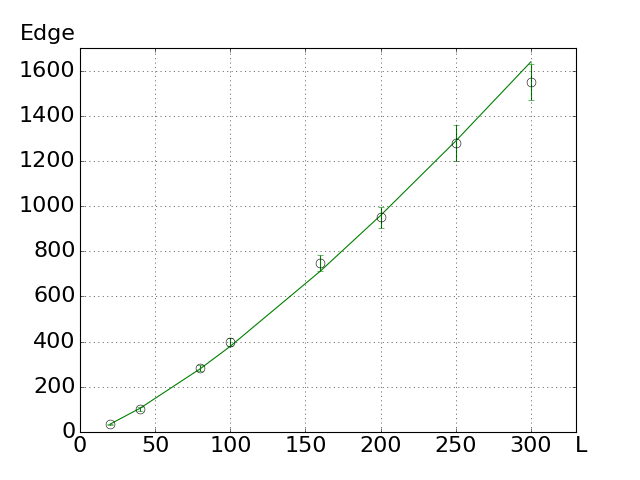

In [30]:
def f(a,b,c, x):
    return a*x**b + c

fig, ax = plt.subplots()
ax.set_xlim([0,320])
ax.plot(L, f(0.94954173,   1.30816655, -13.0404538, L), 'g-')
ax.errorbar(L, L_nz, yerr=SD_nz, fmt='go', ms=8, mfc='none')

#Labels
xlabel = ax.set_xlabel('L', fontsize = 20)
ylabel = ax.set_ylabel('Edge', fontsize = 20, rotation = 0)

#Axis range
ax.set_xlim(0, 330)
ax.set_ylim(0, 1700)

#Labels coordinates
ax.xaxis.set_label_coords(1.01, -0.011)
ax.yaxis.set_label_coords(-0.065, 1.01)
ax.grid(True)
plt.show()

In [ ]:
На данном рисунке проведено приближение среднего размера границы при разных размерах решетки степенной функцией
a*x^b + c. На вертикальной оси - средний размер границы протекающего кластера. На горизонтальной оси размер решетки L. 
Коэффициенты следующие: a=0.94954173 +-0.8842096697, b=1.30816655 +-0.18203296, c=-13.0404538 +-22.184573582

In [9]:
from scipy.optimize import curve_fit

In [34]:
np.sqrt(4.92155305e+02)

22.184573581658043

In [10]:
curve_fit(f=lambda x, a, b, c: a*x**b + c, xdata=L, ydata=L_nz, sigma=SD_nz, absolute_sigma=True)

(array([  0.94954173,   1.30816655, -13.0404538 ]),
 array([[  7.81826740e-01,  -1.60052518e-01,  -1.83907095e+01],
        [ -1.60052518e-01,   3.31359987e-02,   3.68154740e+00],
        [ -1.83907095e+01,   3.68154740e+00,   4.92155305e+02]]))

In [87]:
plt.plot?

In [10]:
np.sqrt(3.49217363e-02)

0.18687358374045274

In [12]:
l_260 = np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\50w200k.txt', dtype=dt)
l_2601 = np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\100w200k.txt', dtype=dt)
l_2602 = np.loadtxt('C:\\Users\\Sergey.Kolotev\\Desktop\\200w200k.txt', dtype=dt)

In [13]:
l_260_sd=l_260['SD'][l_260['SD']!=0]
l_2601_sd=l_2601['SD'][l_2601['SD']!=0]
l_2602_sd=l_2602['SD'][l_2602['SD']!=0]
l_260_s=l_260['size'][l_260['size']!=0]
l_2601_s=l_2601['size'][l_2601['size']!=0]
l_2602_s=l_2602['size'][l_2602['size']!=0]

In [20]:
sd1 = np.sqrt((l_260_sd**2)/l_260_s.size)
sd2 = np.sqrt((l_2601_sd**2)/(l_2601_s.size))
sd3 = np.sqrt((l_2602_sd**2)/(l_2602_s.size))

print(sd1.mean(), l_260_s.size)
print(sd2.mean(), l_2601_s.size)
print(sd3.mean(), l_2602_s.size)

1.40831264533 28
0.845006427572 54
0.582029447984 116


In [23]:
ax.set_xlim?

In [15]:
for i in zip(L,L_nz, SD_nz):
    print(i)

(20, 35.246339892857144, 7.042444538303144)
(40, 101.68657672972972, 16.099902775219437)
(80, 285.2107207674419, 61.227069783115049)
(100, 397.35574869230771, 84.638422813815922)
(160, 748.13311922580658, 166.32917682970725)
(200, 950.25225965624998, 228.56223708972459)
(250, 1278.6140180000002, 364.14774271330919)
(300, 1548.5866634864865, 420.30675754024026)
